<a href="https://colab.research.google.com/github/Ment1984/zarouali-ment-khoualha/blob/main/Data%20Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [4]:
df.isnull().sum()/len(df)*100

,0
FlightNumber,0.000000
Date,0.000000
BoosterVersion,0.000000
PayloadMass,0.000000
Orbit,0.000000
LaunchSite,0.000000
Outcome,0.000000
Flights,0.000000
GridFins,0.000000
Reused,0.000000


In [5]:
df.dtypes

,0
FlightNumber,int64
Date,object
BoosterVersion,object
PayloadMass,float64
Orbit,object
LaunchSite,object
Outcome,object
Flights,int64
GridFins,bool
Reused,bool


In [14]:
pip install matplotlib


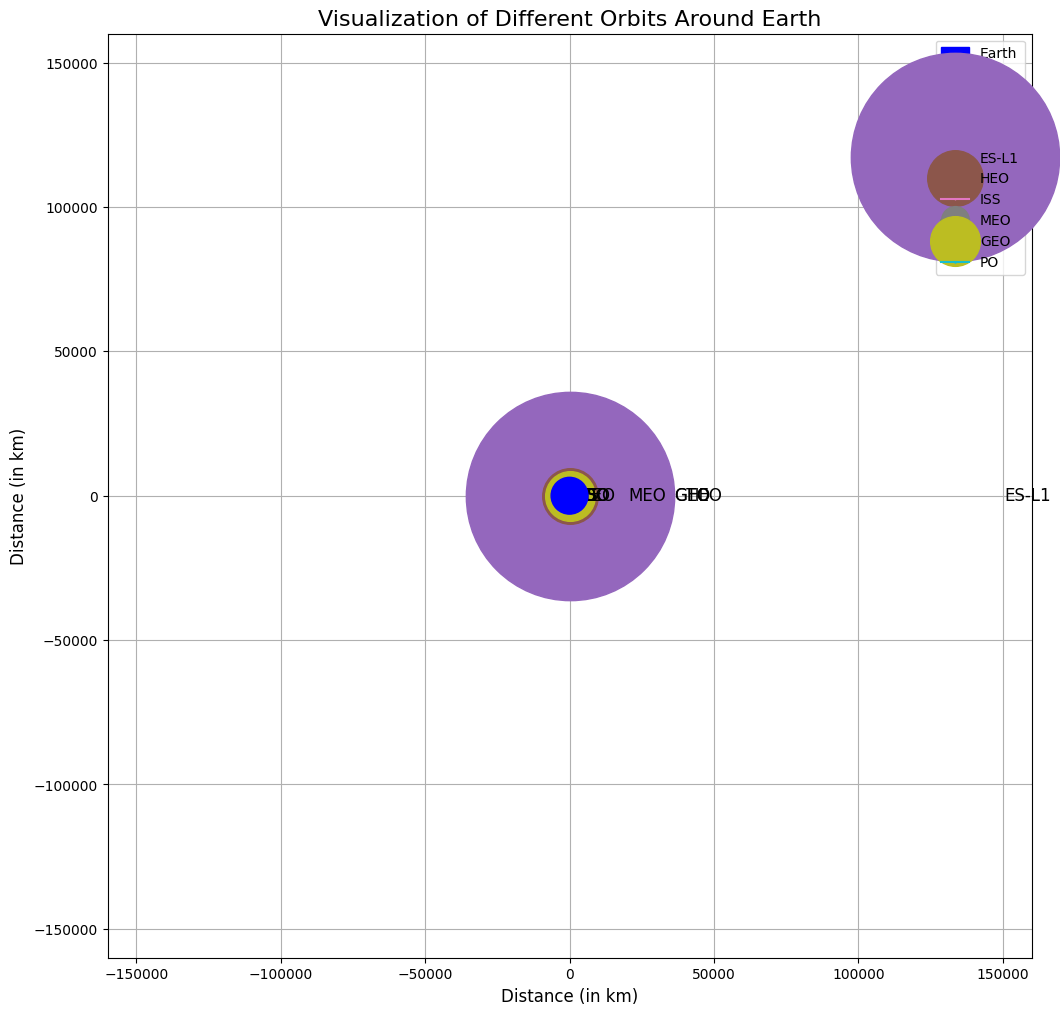

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define Earth radius in km
earth_radius = 6371

# Define the orbital radii for different orbits (in km)
radii = {
    'LEO': 2000,     # Low Earth Orbit (LEO)
    'VLEO': 450,     # Very Low Earth Orbit (VLEO)
    'GTO': 35786,    # Geosynchronous Transfer Orbit (GTO)
    'SSO': 2000,     # Sun-synchronous Orbit (SSO)
    'ES-L1': 150000, # L1 (distance to Lagrange point)
    'HEO': 40000,    # Highly Elliptical Orbit (HEO)
    'ISS': 400,      # International Space Station (ISS)
    'MEO': 20000,    # Medium Earth Orbit (MEO)
    'GEO': 35786,    # Geostationary Orbit (GEO)
    'PO': 800,       # Polar Orbit (PO)
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the Earth (circle) at the center
ax.add_patch(plt.Circle((0, 0), earth_radius, color='blue', label='Earth', zorder=10))

# Plot the orbits as circles around Earth
for orbit, radius in radii.items():
    ax.plot(0, 0, marker='o', markersize=radius/1000, label=orbit, zorder=5)  # Scaling orbit sizes for visualization

# Adding orbit labels
for orbit, radius in radii.items():
    ax.text(radius + 500, 0, orbit, fontsize=12, ha='left', va='center', zorder=6)

# Adding the grid and title
ax.set_title('Visualization of Different Orbits Around Earth', fontsize=16)
ax.set_xlabel('Distance (in km)', fontsize=12)
ax.set_ylabel('Distance (in km)', fontsize=12)
ax.legend()

# Set plot limits
ax.set_xlim([-160000, 160000])
ax.set_ylim([-160000, 160000])
ax.set_aspect('equal', 'box')

# Display the plot
plt.grid(True)
plt.show()


In [21]:
df['LaunchSite'].value_counts()

,count
LaunchSite,
CCAFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


In [22]:
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes

,count
Outcome,
True ASDS,41
None None,19
True RTLS,14
False ASDS,6
True Ocean,5
False Ocean,2
None ASDS,2
False RTLS,1


In [23]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [24]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [25]:
landing_class = []

for key, value in df['Outcome'].items():
    if value in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

In [26]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [27]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [28]:
df["Class"].mean()

0.6666666666666666

In [30]:
df.to_csv("dataset_part_2.csv", index=False)